## import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)
### 

In [3]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [4]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [5]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



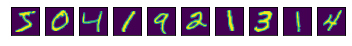


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [7]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

2022-06-13 19:49:17.819228: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-13 19:49:17.819856: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [8]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 




In [9]:
model1 = select_model(1)

In [10]:
model2 = select_model(2)

In [11]:
model3 = select_model(3)

## If you want to see information of model, model.summary() will help
### summary() is also built in function 

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [14]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)              

## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [15]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [16]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [18]:
model1.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.4559 - accuracy: 0.9435
Epoch 2/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0810 - accuracy: 0.9758
Epoch 3/5
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0685 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.0585 - accuracy: 0.9821
Epoch 5/5
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0515 - accuracy: 0.9847


In [19]:
model2.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.3418 - accuracy: 0.9462
Epoch 2/5
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0661 - accuracy: 0.9807
Epoch 3/5
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0544 - accuracy: 0.9834
Epoch 4/5
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.0469 - accuracy: 0.9858
Epoch 5/5
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.0418 - accuracy: 0.9876


In [20]:
model3.fit(train_images, train_labels,  epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 246s 4ms/sample - loss: 0.2007 - accuracy: 0.9546
Epoch 2/5
60000/60000 [==============================] - 222s 4ms/sample - loss: 0.0563 - accuracy: 0.9828
Epoch 3/5
60000/60000 [==============================] - 216s 4ms/sample - loss: 0.0448 - accuracy: 0.9865
Epoch 4/5
60000/60000 [==============================] - 218s 4ms/sample - loss: 0.0394 - accuracy: 0.9884
Epoch 5/5
60000/60000 [==============================] - 226s 4ms/sample - loss: 0.0344 - accuracy: 0.9898


## Test Step 
## Perform Test with Test data 

In [21]:
test_loss, accuracy = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 10s - loss: 0.0774 - accuracy: 0.9701

Test loss :  0.14932884462858464
Test accuracy : 0.9701


In [22]:
test_loss, accuracy = model2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 15s - loss: 0.0325 - accuracy: 0.9827

Test loss :  0.06401678272455465
Test accuracy : 0.9827


In [23]:
test_loss, accuracy = model3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

10000/1 - 16s - loss: 0.0245 - accuracy: 0.9880

Test loss :  0.048516679640392614
Test accuracy : 0.988


## Before prediction, change test image's type to float 32. 

In [24]:
test_images = tf.cast(test_images, tf.float32)
pred1 = model1.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [25]:
test_images = tf.cast(test_images, tf.float32)
pred2 = model2.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [26]:
test_images = tf.cast(test_images, tf.float32)
pred3 = model3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [27]:
print('Prediction 1 : ', pred1.shape)
print('Test labels 1 : ', test_labels.shape)

Prediction 1 :  (10000, 10)
Test labels 1 :  (10000,)


In [28]:
print('Prediction 2 : ', pred2.shape)
print('Test labels 2 : ', test_labels.shape)

Prediction 2 :  (10000, 10)
Test labels 2 :  (10000,)


In [29]:
print('Prediction 3 : ', pred3.shape)
print('Test labels 3 : ', test_labels.shape)

Prediction 3 :  (10000, 10)
Test labels 3 :  (10000,)


## Functions for plot images, probability

In [30]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [31]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

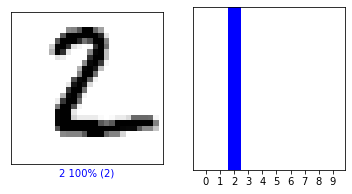

In [32]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred1, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred1,  test_labels)
plt.show()

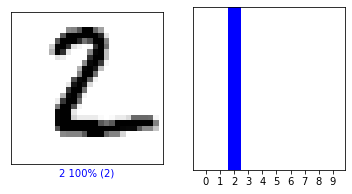

In [33]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred2, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred2,  test_labels)
plt.show()

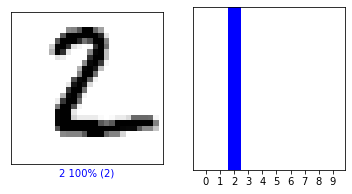

In [34]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred3,  test_labels)
plt.show()

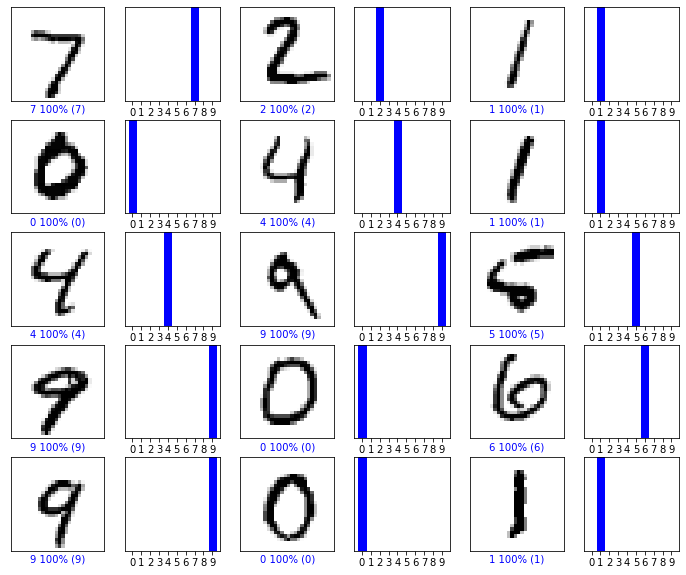

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred1, test_labels)
plt.show()

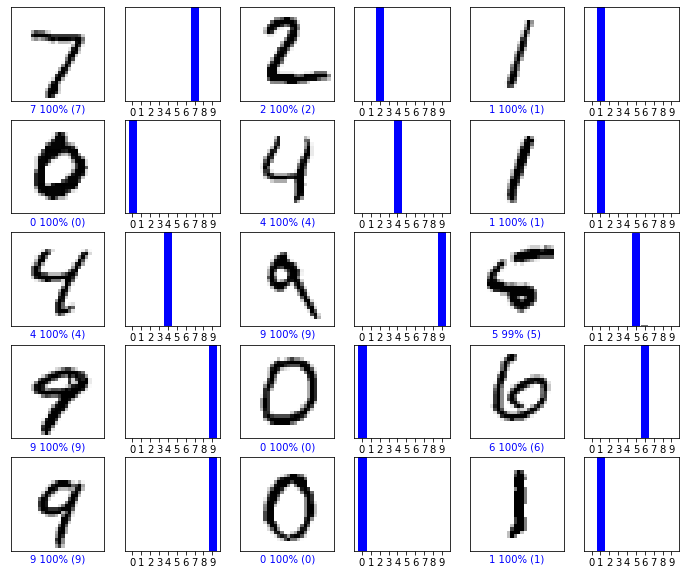

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred2, test_labels)
plt.show()

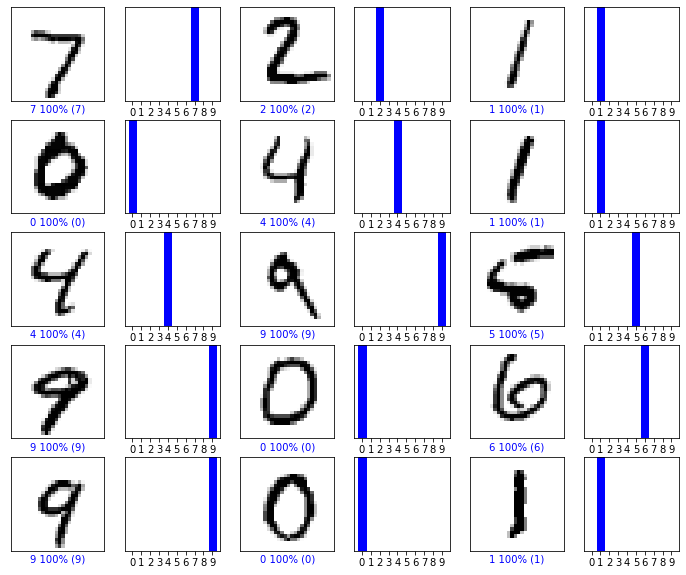

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred3, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [38]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [39]:
index1 = error_mnist(pred1, test_labels)
index_slice1 = index1[:10]
print(index1[:10])

[18, 62, 96, 119, 217, 222, 247, 282, 321, 326]


In [40]:
index2 = error_mnist(pred2, test_labels)
index_slice2 = index2[:10]
print(index2[:10])

[18, 107, 111, 115, 171, 175, 184, 220, 259, 435]


In [41]:
index3 = error_mnist(pred3, test_labels)
index_slice3 = index3[:10]
print(index3[:10])

[36, 115, 250, 447, 497, 582, 583, 625, 659, 674]


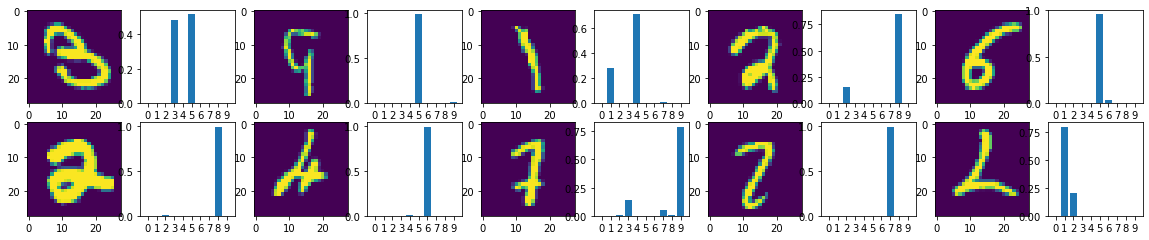

In [42]:
plot_error(index_slice1, pred1, test_labels)

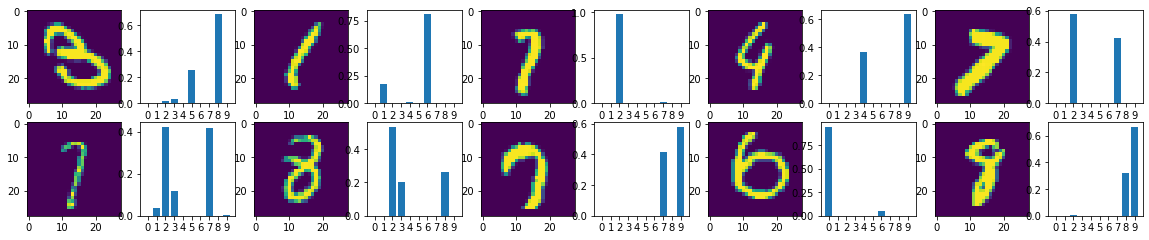

In [43]:
plot_error(index_slice2, pred2, test_labels)

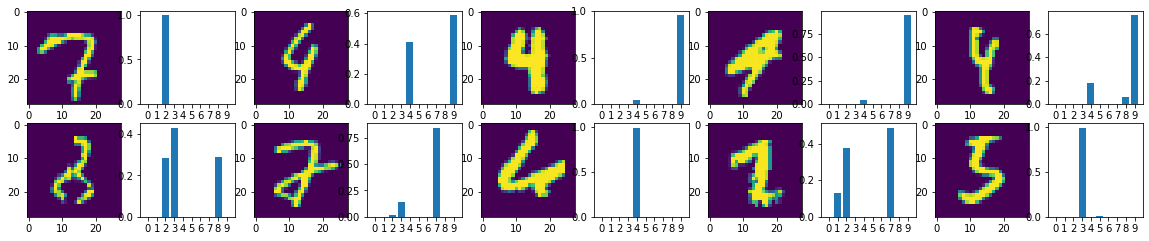

In [44]:
plot_error(index_slice3, pred3, test_labels)

In [45]:
DONE

NameError: name 'DONE' is not defined